## Novelty Filter

I created a file called **input.txt** that contains the KJ Bible. Compile the code and use the following as command line parameters:
```
2000000001 5 12 charToKMap.txt input.txt output.txt filter.txt 10000
```
Details:

- **2000000001**: the code creates a novelty filter with 2000000001 entries (this number is a fairly large prime number reserving about 250MB of memory); the first commandline parameter must always be a prime number!
- **5**: This the number of bits reserved for each character in the text. Normal Ascii characters use 8 bits; here we map them to 5, the `charToKMap.txt` file encodes how. This table should be optimized, I just haven't had time to do it.
- **12** is the number of letters in each `k-mer`. We can at best use 60 bits, so `5*12` is the upper limit. You can use `4*15` as well, or `6*10`, if you change `charToMap.txt` accordingly.
- **input.txt** is the file to load
- **output.txt** is the result file that logs novelty over entries, according to an interval (see below.)
- **filter.txt** is a file that once the filtering is done, the filter is saved to. However, if the `filter.txt` file exists at program start it will load the content of the filter before loading `input.txt` into the filter (explained below).
- **10000** is the interval size. 10000 `k-mers` are added to the filter and then the function calculates how many of these 10000 are new, old, new/(new+old).

We assume that the `input.txt` file and the `charToKMap.txt` file exist and are in the same folder as the compiled c++ code. Name the final program NoveltyFilter. The next code block is a wrapper for the code, so you can use it from within this notebook.

*The function assumes that NoveltyFilter and all .txt files are in the same folder!*

In [ ]:
!rm output.txt filter.txt

In [ ]:
%pylab inline

In [6]:
import subprocess

def NoveltyFilter(path,prime,K,N,mapName,inputName,outputName,filterName,intervall):
    print "{0}/NoveltyFilter".format(path) +" "+str(prime)+" "+str(K)+" "+str(N)+" "+mapName+" "+inputName+" "+outputName+" "+filterName+" "+str(intervall)
    res=subprocess.check_output(["./a.out",str(prime),str(K),str(N),path+"/"+mapName,path+"/"+inputName,path+"/"+outputName,path+"/"+filterName,str(intervall)])
    return res

path="./"
prime=2000000001 
K=5
N=12 
mapName="charToKMap.txt"
inputName="../texts/victorian/Eliot_Middlemarch.txt"
#inputName="../texts/modernism/Joyce_Ulysses.txt"
outputName="output.txt"
filterName="filter.txt"
intervall=10000
print NoveltyFilter(path,prime,K,N,mapName,inputName,outputName,filterName,intervall)

.//NoveltyFilter 2000000001 5 12 charToKMap.txt ../texts/victorian/Eliot_Middlemarch.txt output.txt filter.txt 10000
0 2000000001
1 5
2 12
3 .//charToKMap.txt
4 .//../texts/victorian/Eliot_Middlemarch.txt
5 .//output.txt
6 .//filter.txt
7 10000



The output from above should look something like this:
```    
//Volumes/work/iPhone/Science/NoveltyFilter/build/Release/NoveltyFilter 2000000001 5 12 charToKMap.txt input.txt output.txt filter.txt 10000

0 2000000001
1 5
2 12
3 //Volumes/work/iPhone/Science/NoveltyFilter/build/Release/charToKMap.txt
4 //Volumes/work/iPhone/Science/NoveltyFilter/build/Release/input.txt
5 //Volumes/work/iPhone/Science/NoveltyFilter/build/Release/output.txt
6 //Volumes/work/iPhone/Science/NoveltyFilter/build/Release/filter.txt
7 10000
No file to load from!
```
If the code reports "No file to load from!", then the filter has been initialized as entirely empty; Otherwise data is loaded into the filter. This is important for other comparisons, where we want to see novelty from one item over the other.

The next piece of code just loads the data file output and prints the fraction of novelty:

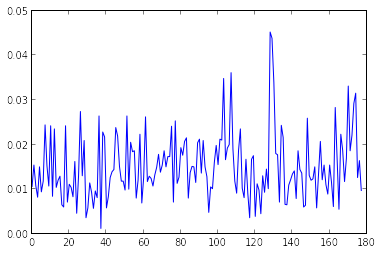

In [8]:
from pandas import *
path = "./"
filename="output.txt"
data=read_csv("{0}/{1}".format(path,filename), sep=",",na_values=[""," "],header=None,prefix="X")
plot(data["X2"])

As a sanity check: If we just loaded the entire KJ Bible into the filter, and we do that again (this time with the filter already containing the data from the first run) we should not expect any novelty!
                                                                                                

.//NoveltyFilter 2000000001 5 12 charToKMap.txt input.txt outputSecondRound.txt filter.txt 10000
0 2000000001
1 5
2 12
3 .//charToKMap.txt
4 .//input.txt
5 .//outputSecondRound.txt
6 .//filter.txt
7 10000



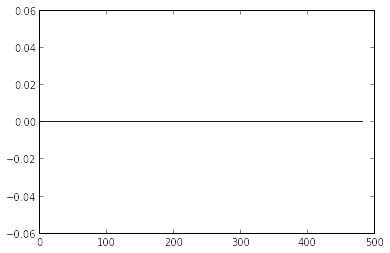

In [11]:
path="./"
prime=2000000001 
K=5
N=12 
mapName="charToKMap.txt"
inputName="input.txt"
outputName="outputSecondRound.txt"
filterName="filter.txt"
intervall=10000
print NoveltyFilter(path,prime,K,N,mapName,inputName,outputName,filterName,intervall)

filename="outputSecondRound.txt"
data=read_csv("{0}/{1}".format(path,filename), sep=",",na_values=[""," "],header=None,prefix="X")
plot(data["X2"])

You don't get the "no file to load from!" warning (check the directory, you should have a `filter.txt` file of ~250MB)
and the new `outputSecond.txt` file contains no novelty, because the filter is alread prefilled, having been loaded from the previous filter.